## Task 1. Hypothesis Testing (2 points)


**The data for this task is in `task_1.csv`**

#### Data task_1.csv:
* index - enumeration
* women_1 - weights of women observed (1st group)
* women_2 - weights of women observed (2nd group)
* men - weights of men observed

### 1.1 Check normality assumption for women_1 and women_2. 

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, bartlett, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('task_1.csv')
df1.set_index("index", inplace=True)
df1.head()

,women_1,women_2,men
index,,,
0,73.098928,78.0,88.274204
1,73.613758,65.0,85.956865
2,56.480751,65.0,66.678725
3,81.904591,91.0,69.819411
4,67.361169,104.0,75.928297


<Axes: xlabel='men', ylabel='Count'>

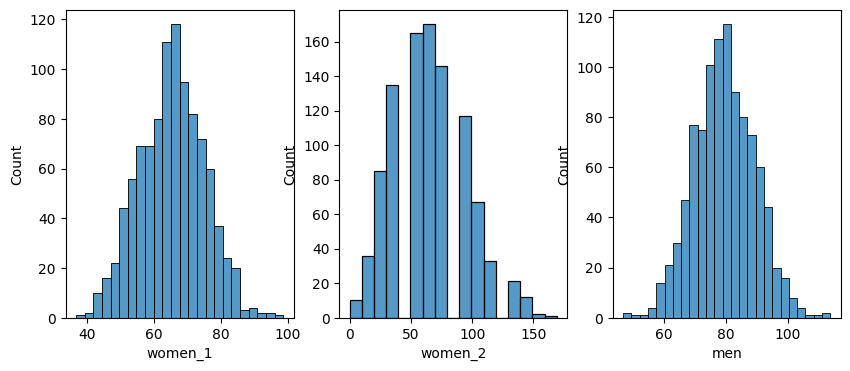

In [4]:
#Let's see to distrubution of our data 
fig, axes = plt.subplots(nrows=1, ncols = 3, figsize=(10,4))
sns.histplot(df1['women_2'], ax =  axes[1])
sns.histplot(df1['women_1'], ax = axes[0])
sns.histplot(df1['men'], ax=axes[2])

In [5]:
# Let's use shapiro test to check noramlity assumption
shapiro_res_women_1 = shapiro(df1['women_1'])
shapiro_res_women_2 = shapiro(df1['women_2'])
shapiro_res_men = shapiro(df1['men'])
print(f'shapiro test for women_1:{shapiro_res_women_1}')
print(f'shapiro test for women_2:{shapiro_res_women_2}')
print(f'shapiro test for men:{shapiro_res_men}')

shapiro test for women_1:ShapiroResult(statistic=0.998351921703062, pvalue=0.461855944686695)
shapiro test for women_2:ShapiroResult(statistic=0.9753982611876824, pvalue=5.605481439754274e-12)
shapiro test for men:ShapiroResult(statistic=0.9990123892708769, pvalue=0.879473067741894)


<span style="color:lightblue">Because pvalue for the women_1 sample bigger than 0.05, we can say that women_1 sample is normally distributed.</span>


<span style="color:lightblue">For sample women_2 we should reject null hypothesis that sample is normally distributed, because p-value significantly less than 0,05.</span>

<span style="color:lightblue">Sample of men is normally distributed (p-value > 0.05).</span>


### 1.2 Check one of the following hypotheses (based on where the normality assumption is met) using t-test with appropriate paramenters:

**1.**
* HO - women_1 have bigger weight than men
* H1 - they are not

**2.**
* HO - women_2 have the same weight as men
* H1 - they are not

In [6]:
# because sample women_1 and mens normally distributed we can use t-test for that
# 1 H0 - women_1 > men, H1 - women_1 <= men, Let's use one-sided t-test
stat, p = ttest_ind(df1['women_1'], df1['men'], alternative='less')
print(f'p-value = {p}')
if(p < 0.05):
    print("We reject H0. Women_1 have less weight than men.")
else:
    print('We reject H1. Women_1 have bigger weight than men.')

p-value = 2.7445218057977547e-187
We reject H0. Women_1 have less weight than men.


In [7]:
# women_2 sample doesn't have gaussian distribution and it's incorrect use t-test, but we can use Mann-Whitney U Test
# 2 H0 - women_2 = men, H1 - women_2 != men
stat, p = mannwhitneyu(df1['women_2'], df1['men'])
print(f'p-value = {p}')
if( p < 0.05):
    print("We reject H0. Weight in samples women_2 and men aren't same")
else:
    print("We reject H1. Weight in samples women_2 and men are same.")

p-value = 5.651518127086711e-47
We reject H0. Weight in samples women_2 and men aren't same


## Task 2. ANOVA (2 points)

Calcium is an essential mineral that regulates the heart, is important for blood clotting and for building healthy bones. The National Osteoporosis Foundation recommends a daily calcium intake of 1000-1200 mg/day for adult men and women. While calcium is contained in some foods, most adults do not get enough calcium in their diets and take supplements. Unfortunately some of the supplements have side effects such as gastric distress, making them difficult for some patients to take on a regular basis.  

 A study is designed to test whether there is a difference in mean daily calcium intake in adults with normal bone density, adults with osteopenia (a low bone density which may lead to osteoporosis) and adults with osteoporosis. Adults 60 years of age with normal bone density, osteopenia and osteoporosis are selected at random from hospital records and invited to participate in the study. Each participant's daily calcium intake is measured based on reported food intake and supplements. The data are shown below. 

Key steps to follow:

* Checking assumptions for ANOVA
* Performing Anova
* Interpret the results (in markdown or as a comment)

In [8]:
anova_raw = {
    'Normal Bone Density': [1200, 1000, 980, 900, 750, 800],
    'Osteopenia': [1000, 1100, 700, 800, 500, 700],
    'Osteoporosis': [890, 650, 1100, 900, 400, 350]
}

### 2.1 Check assumptions for normality using Shapiro-Wilk test

In [9]:
_, shapiro_res_nrml_bn_dnst = shapiro(anova_raw['Normal Bone Density'])
print(f'shpiro test for Normal Bone Density: {shapiro_res_nrml_bn_dnst}')
if(shapiro_res_nrml_bn_dnst > 0.05):
    print("Sample of Normal Bone Density is distributed normally")
else:
    print("Sample of Normal Bone Density DOESN'T  distributed normally")

shpiro test for Normal Bone Density: 0.7838430039804427
Sample of Normal Bone Density is distributed normally


In [10]:
_, shapiro_res_osteopenia = shapiro(anova_raw['Osteopenia'])
print(f'shpiro test for Osteopenia: {shapiro_res_osteopenia}')
if(shapiro_res_osteopenia > 0.05):
    print("Sample of Osteopenia is distributed normally")
else:
    print("Sample of Osteopenia DOESN'T  distributed normally")

shpiro test for Osteopenia: 0.7828272225606586
Sample of Osteopenia is distributed normally


In [11]:
_, shapiro_res_osteoperosis = shapiro(anova_raw['Osteoporosis'])
print(f'shpiro test for Osteoporosis: {shapiro_res_osteoperosis}')
if(shapiro_res_osteoperosis > 0.05):
    print("Sample of Osteoporosis is distributed normally")
else:
    print("Sample of Osteoporosis DOESN'T  distributed normally")

shpiro test for Osteoporosis: 0.5160526301666948
Sample of Osteoporosis is distributed normally


### 2.2 Сheck the assumption of homogeneity of variances

In [12]:
# Let's use Barlett's test to check assumption of homogeneity of variances
_, barlett_res = bartlett(anova_raw['Normal Bone Density'], anova_raw['Osteopenia'], anova_raw['Osteoporosis'])
print(f"p-value = {barlett_res}")
if(barlett_res < 0.05):
    print("Reject null hypothesis of equal variances.")
else:
    print("Variances between groups are equal.")

p-value = 0.423762444958117
Variances between groups are equal.


### 2.3 Perform ANOVA and interpret the results

In [13]:
# H0 - samples are same, H1 - they are not
_, pvalue_f = f_oneway(anova_raw['Normal Bone Density'], anova_raw['Osteopenia'], anova_raw['Osteoporosis'])
print(f"pvalue = {pvalue_f}")
if(pvalue_f < 0.05):
    print("We reject null hypothesis. Samples don't have same distrubution.")
else:
    print("There is no statiscal significant difference between groups.")

pvalue = 0.2782290200522075
There is no statiscal significant difference between groups.


<span style="color:lightblue">There is no statiscal significant difference of calcium entry between groups.</span>

## Task 3. Linear Regression

Given the Dataset in `task_3.csv` make some necessary transformations and train regression model to predict flight tickets' price.

### Dataset Description

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

**Dataset**
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

**Features**

The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

*Dataset is already cleaned*


### 3.1 Data Transformation:

- Transform categorical variables to numeric form. Decide on the most appropriate method, such as one-hot encoding, label encoding, or any other relevant technique.
- Provide justifications for the chosen transformation method and discuss any variables that might be excluded.

In [14]:
df3 = pd.read_csv('task_3.csv')
df3.set_index('index', inplace=True)
df3.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
index,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [16]:
# Let's for columns departure_time stops arrival_time class use label encoder, because this types have ranked categories
df3_prepared = df3
df3_prepared['stops'] = df3_prepared['stops'].replace({'zero':0, 'one':1, 'two_or_more':2})

df3_prepared['class'] = df3_prepared['class'].replace({'Economy':0, 'Business':1})

df3_prepared['departure_time'] = df3_prepared['departure_time'].replace({'Early_Morning':0, 'Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4, 'Late_Night':5})

df3_prepared['arrival_time'] = df3_prepared['arrival_time'].replace({'Early_Morning':0, 'Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4, 'Late_Night':5})
df3_prepared


/tmp/ipykernel_10465/411250919.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3_prepared['stops'] = df3_prepared['stops'].replace({'zero':0, 'one':1, 'two_or_more':2})
/tmp/ipykernel_10465/411250919.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3_prepared['class'] = df3_prepared['class'].replace({'Economy':0, 'Business':1})
/tmp/ipykernel_10465/411250919.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.in

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
index,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,3,0,4,Mumbai,0,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,0,0,1,Mumbai,0,2.33,1,5953
2,AirAsia,I5-764,Delhi,0,0,0,Mumbai,0,2.17,1,5956
3,Vistara,UK-995,Delhi,1,0,2,Mumbai,0,2.25,1,5955
4,Vistara,UK-963,Delhi,1,0,1,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,1,1,3,Hyderabad,1,10.08,49,69265
300149,Vistara,UK-826,Chennai,2,1,4,Hyderabad,1,10.42,49,77105
300150,Vistara,UK-832,Chennai,0,1,4,Hyderabad,1,13.83,49,79099


In [17]:
# Let's for columns airline  source_city destination_city use one-hot encoding 
# because this types of categories don't have any rank
# delete flight column - id of flight
airline_dum = pd.get_dummies(df3_prepared['airline']).astype(int)
df3_prepared['source_city'] = df3_prepared['source_city'] + '_source'
df3_prepared['destination_city'] = df3_prepared['destination_city'] + '_dest'
source_dum = pd.get_dummies(df3_prepared['source_city']).astype(int)
dest_dum = pd.get_dummies(df3_prepared['destination_city']).astype(int)
df3_prepared = pd.concat([df3_prepared, airline_dum, dest_dum, source_dum], axis=1)
df3_prepared.drop(['airline', 'source_city', 'destination_city', 'flight'], axis=1, inplace=True)
df3_prepared

,departure_time,stops,arrival_time,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,...,Delhi_dest,Hyderabad_dest,Kolkata_dest,Mumbai_dest,Bangalore_source,Chennai_source,Delhi_source,Hyderabad_source,Kolkata_source,Mumbai_source
index,,,,,,,,,,,,,,,,,,,,,
0,3,0,4,0,2.17,1,5953,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,2.33,1,5953,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,2.17,1,5956,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0,2,0,2.25,1,5955,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,1,0,1,0,2.33,1,5955,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,3,1,10.08,49,69265,0,0,0,...,0,1,0,0,0,1,0,0,0,0
300149,2,1,4,1,10.42,49,77105,0,0,0,...,0,1,0,0,0,1,0,0,0,0
300150,0,1,4,1,13.83,49,79099,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### 3.2 Visualization of Variables:

- Visualize the correlation between variables. Use techniques like correlation matrices or heatmap to represent relationships between different features.
- Discuss any interesting observations or patterns identified during visualization.

In [18]:
df3_prepared.corr() 

,departure_time,stops,arrival_time,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,...,Delhi_dest,Hyderabad_dest,Kolkata_dest,Mumbai_dest,Bangalore_source,Chennai_source,Delhi_source,Hyderabad_source,Kolkata_source,Mumbai_source
departure_time,1.000000,-0.068986,-0.079679,0.030956,0.132773,-0.000222,0.020948,0.029676,-0.002027,-0.017565,...,-0.007173,0.011249,0.015627,-0.023234,-0.028340,-0.023547,0.010879,0.018848,0.031820,-0.009257
stops,-0.068986,1.000000,0.046436,0.001027,0.468059,-0.008540,0.119648,0.038277,0.060215,-0.033363,...,-0.104565,0.029073,0.062722,-0.046849,0.005822,0.021379,-0.052321,0.011196,0.046828,-0.022452
arrival_time,-0.079679,0.046436,1.000000,-0.022473,-0.123949,-0.000700,-0.001019,0.035148,-0.054225,0.023756,...,0.084061,-0.033988,-0.058320,0.015227,-0.012541,0.025514,-0.053604,0.015249,0.014412,0.018350
class,0.030956,0.001027,-0.022473,1.000000,0.138710,-0.013039,0.937860,-0.160113,0.124899,-0.194540,...,-0.021200,0.007564,-0.012987,0.010573,0.004291,0.010204,-0.014098,0.003367,-0.019162,0.015941
duration,0.132773,0.468059,-0.123949,0.138710,1.000000,-0.039157,0.204222,-0.108547,0.277283,-0.139380,...,-0.115412,0.065762,0.061440,-0.043900,-0.012218,0.033053,-0.049719,0.002595,0.061133,-0.023329
days_left,-0.000222,-0.008540,-0.000700,-0.013039,-0.039157,1.000000,-0.091949,0.030377,-0.022721,0.030408,...,0.006233,-0.000018,-0.003840,-0.004337,-0.001667,0.002581,-0.001292,0.010817,0.000265,-0.008742
price,0.020948,0.119648,-0.001019,0.937860,0.204222,-0.091949,1.000000,-0.176188,0.070041,-0.194179,...,-0.052527,-0.008292,0.020956,0.010533,0.011702,0.018742,-0.043282,-0.012828,0.016127,0.013206
AirAsia,0.029676,0.038277,0.035148,-0.160113,-0.108547,0.030377,-0.176188,1.000000,-0.144596,-0.068858,...,0.051026,-0.030960,0.005273,-0.029994,0.022334,-0.025487,0.040231,-0.014866,0.014049,-0.040083
Air_India,-0.002027,0.060215,-0.054225,0.124899,0.277283,-0.022721,0.070041,-0.144596,1.000000,-0.175687,...,-0.017354,0.010900,-0.006201,0.042490,-0.039237,-0.011600,0.009886,0.001987,-0.001883,0.036697
GO_FIRST,-0.017565,-0.033363,0.023756,-0.194540,-0.139380,0.030408,-0.194179,-0.068858,-0.175687,1.000000,...,0.034305,-0.025814,-0.001016,0.026916,0.015780,-0.063273,0.030585,-0.023541,0.000409,0.026898


In [19]:
# we can see that arrival time and departure time and some source and destination cities are low correlated with price, let's drop this
df3_prepared.drop(['arrival_time', 'departure_time', 
                   'Bangalore_dest','Chennai_dest', 'Hyderabad_dest', 'Kolkata_dest', 'Mumbai_dest', 
                   'Bangalore_source', 'Chennai_source', 'Hyderabad_source', 'Kolkata_source', 'Mumbai_source'
                   ], axis=1, inplace=True)
df3_prepared

,stops,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Delhi_dest,Delhi_source
index,,,,,,,,,,,,,
0,0,0,2.17,1,5953,0,0,0,0,1,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,0,0,1
2,0,0,2.17,1,5956,1,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,0,1,0,1
4,0,0,2.33,1,5955,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,1,0,0
300149,1,1,10.42,49,77105,0,0,0,0,0,1,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,1,0,0


In [20]:
df3_prepared.corr()

,stops,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Delhi_dest,Delhi_source
stops,1.000000,0.001027,0.468059,-0.008540,0.119648,0.038277,0.060215,-0.033363,-0.172133,-0.087293,0.098758,-0.104565,-0.052321
class,0.001027,1.000000,0.138710,-0.013039,0.937860,-0.160113,0.124899,-0.194540,-0.275477,-0.118325,0.302116,-0.021200,-0.014098
duration,0.468059,0.138710,1.000000,-0.039157,0.204222,-0.108547,0.277283,-0.139380,-0.365953,0.008776,0.132430,-0.115412,-0.049719
days_left,-0.008540,-0.013039,-0.039157,1.000000,-0.091949,0.030377,-0.022721,0.030408,0.007839,-0.024414,-0.007002,0.006233,-0.001292
price,0.119648,0.937860,0.204222,-0.091949,1.000000,-0.176188,0.070041,-0.194179,-0.280882,-0.114019,0.360816,-0.052527,-0.043282
AirAsia,0.038277,-0.160113,-0.108547,0.030377,-0.176188,1.000000,-0.144596,-0.068858,-0.097506,-0.041881,-0.205076,0.051026,0.040231
Air_India,0.060215,0.124899,0.277283,-0.022721,0.070041,-0.144596,1.000000,-0.175687,-0.248781,-0.106858,-0.523242,-0.017354,0.009886
GO_FIRST,-0.033363,-0.194540,-0.139380,0.030408,-0.194179,-0.068858,-0.175687,1.000000,-0.118471,-0.050886,-0.249171,0.034305,0.030585
Indigo,-0.172133,-0.275477,-0.365953,0.007839,-0.280882,-0.097506,-0.248781,-0.118471,1.000000,-0.072057,-0.352838,-0.002593,-0.012615
SpiceJet,-0.087293,-0.118325,0.008776,-0.024414,-0.114019,-0.041881,-0.106858,-0.050886,-0.072057,1.000000,-0.151553,0.040668,0.033040


### 3.3 Optional Graphs:

- Create additional graphs that you find helpful and insightful for understanding the dataset.
- Examples of optional graphs include distribution plots, box plots, or any other visualization that might provide useful insights. 

<Axes: xlabel='class', ylabel='price'>

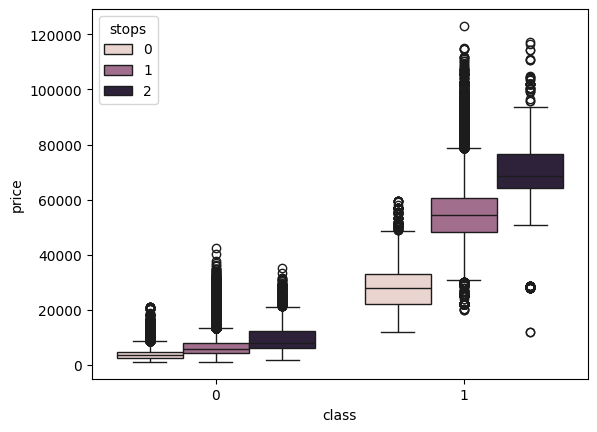

In [21]:
sns.boxplot(data=df3_prepared, x='class', y='price',hue='stops') # Class has statisally significant influence on price

<Axes: xlabel='airline', ylabel='price'>

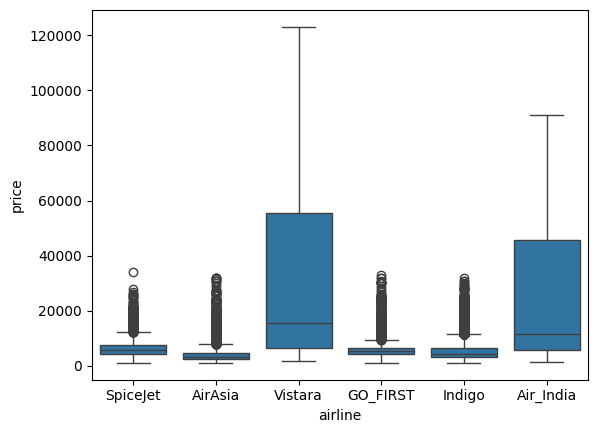

In [22]:
sns.boxplot(data=df3, x='airline', y='price') # Airline doesn't have strong influence on price

<Axes: xlabel='source_city', ylabel='price'>

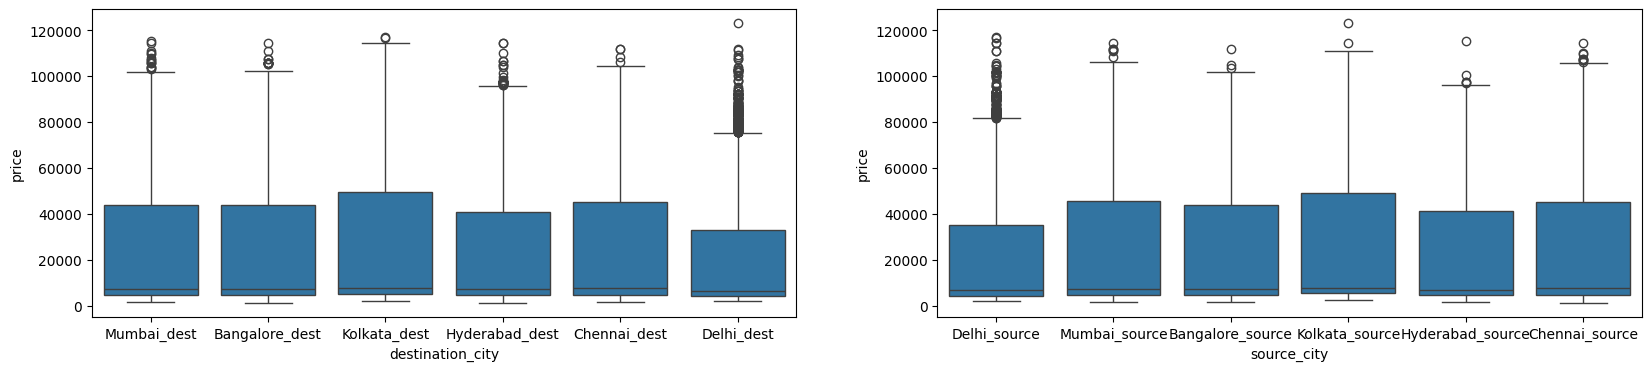

In [23]:
fig, axes = plt.subplots(nrows=1, ncols = 2, figsize=(20,4))
sns.boxplot(data=df3, x='destination_city', y='price', ax=axes[0]) # There is no statistically significant differences
sns.boxplot(data=df3, x='source_city', y='price', ax=axes[1])

### 3.4 Linear Regression:
- Perform linear regression to predict ticket prices based on relevant independent variables. Choose variables that are likely to influence the ticket price.
- Evaluate the results using R squared (coefficient of determination) to assess the goodness of fit of the regression model.
- Provide interpretation of the coefficients and discuss the overall performance of the model.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
# train_X = df3_prepared.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df3_prepared.drop('price', axis=1), df3_prepared['price'])

In [26]:
rmodel = LinearRegression()
rmodel.fit(X_train, y_train)

LinearRegression()

In [27]:
r_sq = rmodel.score(X_test, y_test)
print(f"Coefficient of determination: {r_sq}")

Coefficient of determination: 0.9078163898136268



<span style="color:pink">We have satisfactory result: coefficient of determination equal 0.9. Our model more fitted when R squared is closer to 1.</span>

In [28]:
print(rmodel.coef_)
print(rmodel)

[ 5861.09740846 45216.57408086    79.82534989  -130.24101815
 -1948.59609458 -1799.37880655   161.29540954   466.16753956
   936.29342487  2184.21852716 -1343.49805416 -1487.28394614]
LinearRegression()


In [29]:
# Let's interpret linear models coeffs
import statsmodels.api as sm
ols_model = sm.OLS(df3_prepared['price'], df3_prepared.drop('price', axis=1)).fit() # linear regression model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 2.662e+05
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:45:07   Log-Likelihood:            -3.0799e+06
No. Observations:              300153   AIC:                         6.160e+06
Df Residuals:                  300141   BIC:                         6.160e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
stops         5833.7789     36.608    159.357   

<span style="color:pink">From this table we can see that all coefficients are statiscally significant (p-value approximate to zero). We can say class has the strongest influence on the target.</span>

## Task 4. Classification (3 points)

Given the Dataset in `task_4.csv` make some necessary transformations and train the model to classify the obesity type.

### Dataset Description

The data contains 17 attributes and 2111 records, the records are labeled with the **class variable NObesity (Obesity Level), that allows classification of the data** using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS), other variables obtained were: Gender, Age, Height and Weight.

**Questions of the survey used for initial recollection of information**

Question (Possible Answers)

* What is your gender?	•Female •Male
* What is your age?	Numeric value
* What is your height?	Numeric value in meters
* What is your weight?	Numeric value in kilograms
* Has a family member suffered or suffers from overweight?	•Yes •No
* Do you eat high caloric food frequently? •Yes •No
* Do you usually eat vegetables in your meals?	•Never •Sometimes •Always
* How many main meals do you have daily?	•Between 1 y 2 •Three •More than three
* Do you eat any food between meals? •No •Sometimes •Frequently •Always
* Do you smoke? •Yes •No
* How much water do you drink daily? •Less than a liter •Between 1 and 2 L •More than 2 L
* Do you monitor the calories you eat daily? •Yes •No
* How often do you have physical activity? •I do not have •1 or 2 days •2 or 4 days •4 or 5 days
* How much time do you use technological devices such as cell phone, videogames, television, computer and others? •0–2 hours •3–5 hours •More than 5 hours
* How often do you drink alcohol? •I do not drink •Sometimes •Frequently •Always
* Which transportation do you usually use? •Automobile •Motorbike •Bike •Public Transportation •Walking


### 4.1 Data Preparation:

- Identify and handle missing values, outliers, or any other data quality issues.
- Convert categorical variables into a suitable format for modeling.
- Discuss any decisions made during the data cleaning process.

In [30]:
df4 = pd.read_csv('task_4.csv')
df4.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [31]:
df4.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [32]:
print(df4.isnull().sum())
print(df4.isna().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O           

In [33]:
df4.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

<Axes: xlabel='NObeyesdad', ylabel='Count'>

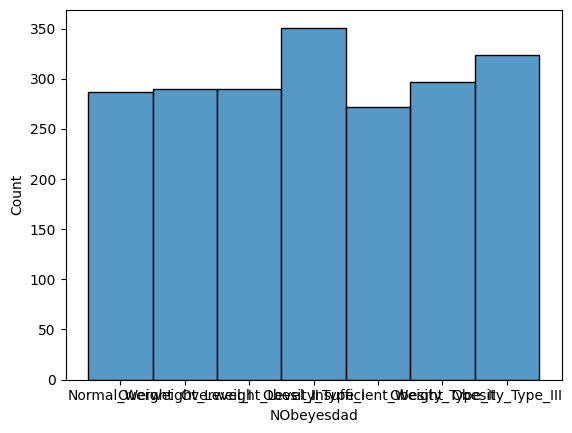

In [34]:
sns.histplot(df4['NObeyesdad'])

In [35]:
# There are not missing values or outliers

In [36]:
# Let's convert object types to integer
df4_prep = df4
df4_prep['Gender'].replace({'Female':0, 'Male':1}, inplace= True)
df4_prep['family_history_with_overweight'].replace({'yes':1, 'no':0}, inplace=True)
df4_prep['FAVC'].replace({'yes':1,'no':0}, inplace=True)
df4_prep['CAEC'].replace({'no':0,'No':0, 'Sometimes':1, 'Frequently':2, 'Always':3},inplace=True)
df4_prep['SMOKE'].replace({'yes':1, 'no':0}, inplace=True)
df4_prep['SCC'].replace({'yes':1, 'no':0}, inplace=True)
df4_prep['CALC'].replace({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3},inplace=True)
df4_prep['MTRANS'].replace({'Automobile':0, 'Motorbike':1,'Public_Transportation':2, 'Bike':3, 'Walking':4}, inplace=True)
df4_prep['NObeyesdad'].replace({'Insufficient_Weight':0,'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3, 'Obesity_Type_I':4, 'Obesity_Type_II':5,'Obesity_Type_III':6}, inplace=True)

/tmp/ipykernel_10465/111318788.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4_prep['Gender'].replace({'Female':0, 'Male':1}, inplace= True)
/tmp/ipykernel_10465/111318788.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4_prep['Gender'].replace({'Female':0, 'Male':1}, inplace= True)
/t

In [37]:
print(df4_prep.dtypes)
print(df4.describe())

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
NObeyesdad                          int64
dtype: object
            Gender          Age       Height       Weight  \
count  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.505921    24.312600     1.701677    86.586058   
std       0.500083     6.345968     0.093305    26.191172   
min       0.000000    14.000

### 4.2 Training and Hyperparameter Tuning::

- Select a classification model for predicting 'NObeyesdad'
- Split the dataset into training and testing sets.
- Train the chosen model on the training set.

In [38]:
# Let's use DecisionTreeClassifier classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score
X_train4, X_test4, y_train4, y_test4= train_test_split(df4_prep.drop('NObeyesdad', axis=1),df4_prep['NObeyesdad'])
model = DecisionTreeClassifier()

In [39]:
model.fit(X_train4, y_train4)

DecisionTreeClassifier()

### 4.3 Model Evaluation:

- Evaluate the trained model on the testing set.
- Choose appropriate evaluation metrics for a classification task (e.g., accuracy, precision, recall, F1-score).

In [40]:
y_predict = model.predict(X_test4)
print(f"recall_score: {recall_score(y_test4, y_predict, average=None)}")
print(f"accurancy_score: {accuracy_score(y_test4, y_predict)}")
print(f"precision_score:{precision_score(y_test4, y_predict, average=None)}")


recall_score: [0.90361446 0.88235294 0.8625     0.96875    0.93975904 0.96103896
 0.98630137]
accurancy_score: 0.928030303030303
precision_score:[0.98684211 0.83333333 0.92       0.86111111 0.93975904 0.94871795
 1.        ]


<span style="color:pink">How we can see we got good classifier model. All score metrics are close to 1.</span>